# Building a Simple Matrix Factorization for Movies Recomendation 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv


## Importing some libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
 
%matplotlib inline

## Loading the data

In [3]:
df = pd.read_csv('../input/the-movies-dataset/ratings_small.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [5]:
print('Number of users: {0}'.format(len(df.userId.unique())))
print('Number of movies: {0}'.format(len(df.movieId.unique())))

Number of users: 671
Number of movies: 9066


In [6]:
# Convert movieId and userId to zero-indexing
df.userId = df.userId.astype('category').cat.codes.values
df.movieId = df.movieId.astype('category').cat.codes.values
df.head()

,userId,movieId,rating,timestamp
0,0,30,2.5,1260759144
1,0,833,3.0,1260759179
2,0,859,3.0,1260759182
3,0,906,2.0,1260759185
4,0,931,4.0,1260759205


In [7]:
# Splitting the data into train and test set
train, test = train_test_split(df, test_size = 0.2)

## Building and traning the model

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam

n_users, n_movies = len(df.userId.unique()), len(df.movieId.unique())
n_latent_factors = 20
# movie input model
movie_input = keras.layers.Input(shape = (1,), name = 'Item')
movie_embedding = keras.layers.Embedding(input_dim = n_movies , output_dim = n_latent_factors, 
                                         name='Movie-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name = 'FlatternMovies')(movie_embedding)

# user input model
user_input = keras.layers.Input(shape=(1,),name='User')
user_embedding = keras.layers.Embedding(input_dim = n_users, output_dim = n_latent_factors,
                                        name='User-Embedding')(user_input)
user_vec = keras.layers.Flatten(name = 'FlatternUser')(user_embedding)

# dot product movie and user vectors
prod = keras.layers.dot([movie_vec, user_vec], axes=1,name='DotProduct')
model = keras.Model(inputs = [user_input, movie_input], outputs = prod)

In [10]:
# compile the model using adam optimizer and mse loss
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
User (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 20)        181320      Item[0][0]                       
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 20)        13420       User[0][0]                       
______________________________________________________________________________________________

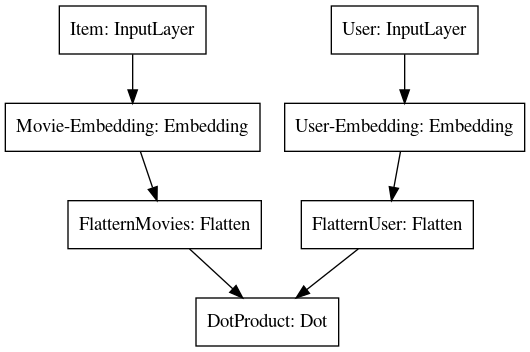

In [12]:
# plot the model
tf.keras.utils.plot_model(model, to_file='model.png')

In [14]:
# train the model
history = model.fit((train.userId, train.movieId), train.rating, epochs=100, verbose=1, validation_split = 0.2)

Epoch 1/100
2001/2001 [==============================] - 6s 3ms/step - loss: 3.6465 - mae: 1.5477 - mse: 3.6465 - val_loss: 2.6369 - val_mae: 1.2518 - val_mse: 2.6369
Epoch 2/100
2001/2001 [==============================] - 6s 3ms/step - loss: 1.7901 - mae: 1.0156 - mse: 1.7901 - val_loss: 1.8567 - val_mae: 1.0023 - val_mse: 1.8567
Epoch 3/100
2001/2001 [==============================] - 6s 3ms/step - loss: 1.2322 - mae: 0.8360 - mse: 1.2322 - val_loss: 1.5730 - val_mae: 0.9098 - val_mse: 1.5730
Epoch 4/100
2001/2001 [==============================] - 7s 3ms/step - loss: 0.9818 - mae: 0.7514 - mse: 0.9818 - val_loss: 1.4600 - val_mae: 0.8715 - val_mse: 1.4600
Epoch 5/100
2001/2001 [==============================] - 6s 3ms/step - loss: 0.8414 - mae: 0.7002 - mse: 0.8414 - val_loss: 1.4028 - val_mae: 0.8552 - val_mse: 1.4028
Epoch 6/100
2001/2001 [==============================] - 6s 3ms/step - loss: 0.7561 - mae: 0.6670 - mse: 0.7561 - val_loss: 1.3744 - val_mae: 0.8437 - val_mse: 1.374

Epoch 50/100
2001/2001 [==============================] - 6s 3ms/step - loss: 0.1099 - mae: 0.2348 - mse: 0.1099 - val_loss: 1.8098 - val_mae: 0.9981 - val_mse: 1.8098
Epoch 51/100
2001/2001 [==============================] - 6s 3ms/step - loss: 0.1086 - mae: 0.2336 - mse: 0.1086 - val_loss: 1.8134 - val_mae: 0.9991 - val_mse: 1.8134
Epoch 52/100
2001/2001 [==============================] - 6s 3ms/step - loss: 0.1074 - mae: 0.2320 - mse: 0.1074 - val_loss: 1.8258 - val_mae: 1.0031 - val_mse: 1.8258
Epoch 53/100
2001/2001 [==============================] - 6s 3ms/step - loss: 0.1057 - mae: 0.2301 - mse: 0.1057 - val_loss: 1.8375 - val_mae: 1.0061 - val_mse: 1.8375
Epoch 54/100
2001/2001 [==============================] - 6s 3ms/step - loss: 0.1044 - mae: 0.2289 - mse: 0.1044 - val_loss: 1.8440 - val_mae: 1.0078 - val_mse: 1.8440
Epoch 55/100
2001/2001 [==============================] - 6s 3ms/step - loss: 0.1035 - mae: 0.2275 - mse: 0.1035 - val_loss: 1.8494 - val_mae: 1.0103 - val_mse:

Epoch 99/100
2001/2001 [==============================] - 6s 3ms/step - loss: 0.0775 - mae: 0.1949 - mse: 0.0775 - val_loss: 2.1790 - val_mae: 1.0989 - val_mse: 2.1790
Epoch 100/100
2001/2001 [==============================] - 6s 3ms/step - loss: 0.0772 - mae: 0.1943 - mse: 0.0772 - val_loss: 2.1801 - val_mae: 1.0976 - val_mse: 2.1801


## Evaluate the model

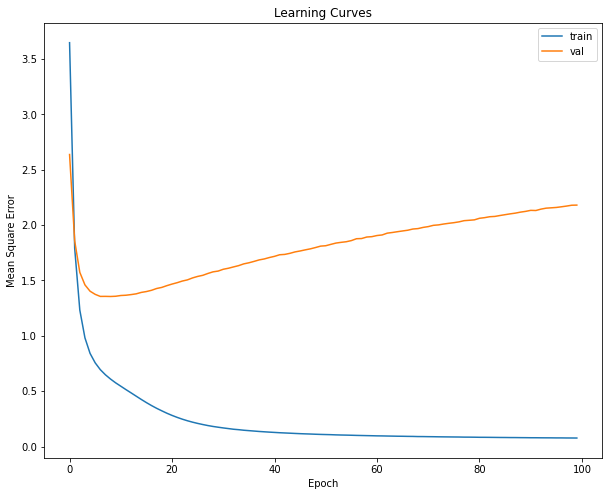

In [17]:
# plot the learning curves
fig = plt.figure(figsize = (10,8))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.legend()
plt.show()

In [19]:
result = model.evaluate((test.userId, test.movieId), test.rating, batch_size=1)
print('The test loss is: {0}'.format(result))

20001/20001 [==============================] - 27s 1ms/step - loss: 2.1120 - mae: 1.0758 - mse: 2.1120
The test loss is: [2.1120004653930664, 1.0758172273635864, 2.1120004653930664]


## Get the embedding layers and do recomendation

In [20]:
movie_embedding_learnt = model.get_layer(name='Movie-Embedding').get_weights()[0]
pd.DataFrame(movie_embedding_learnt)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.486327,0.446680,-0.620645,0.060034,0.030866,0.558975,-0.216651,0.348469,-0.387400,0.133608,-0.008080,-0.618558,-0.110019,-0.582857,0.242218,-0.163220,0.386575,0.773711,-0.599990,-0.385620
1,0.355564,0.289133,-0.331908,-0.350686,0.324591,0.126759,0.218814,-0.165944,-0.464673,0.634042,-0.467557,-0.877820,-0.088628,-0.571438,0.458427,-0.651517,-0.028708,0.402572,-0.049255,-0.274896
2,0.526743,0.627989,-1.182893,-0.695632,0.485886,0.030977,0.489575,0.865392,-0.475699,0.399683,-0.579523,-0.073546,0.246183,-0.199796,-0.878769,-0.027690,0.400304,0.066457,-0.879621,-0.274724
3,0.051415,0.172552,-0.360746,0.641296,-0.449224,0.287895,0.122250,0.592199,-0.789678,-0.209899,-0.118411,-0.428783,-0.304175,-0.090435,-0.048897,-0.673236,-0.048337,0.540204,-0.219719,1.100929
4,0.306062,1.091250,0.675512,0.850938,0.492012,0.030048,0.440121,-0.593868,-0.619720,-0.359163,0.050126,-0.165603,-0.556039,-0.441516,0.416680,-1.541695,0.790208,-0.448341,-0.919118,0.566157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9061,0.409062,0.440489,-0.404461,0.290427,0.365412,0.360032,0.388077,0.437742,-0.325053,0.380552,-0.403871,-0.363758,-0.417431,-0.397938,0.272699,-0.172157,0.295872,0.387676,-0.381339,-0.265721
9062,-0.041034,-0.003097,0.004322,0.022392,0.005360,-0.044928,0.014568,-0.017414,-0.005679,0.044377,0.003689,0.025925,0.005594,-0.036135,0.026870,0.018460,0.006661,0.037591,0.013197,-0.019450
9063,0.049958,0.042947,-0.031682,-0.007178,-0.010885,-0.015227,-0.029576,0.043796,-0.037386,0.041119,-0.030299,0.022198,0.042952,-0.046797,0.004976,-0.048672,-0.018190,-0.038097,0.007185,-0.007428
9064,0.219228,0.275850,-0.276490,0.211230,0.234323,0.296891,0.316267,0.279344,-0.200765,0.224323,-0.144031,-0.275096,-0.212880,-0.221332,0.241586,-0.275283,0.280812,0.219657,-0.281150,-0.241001


In [21]:
user_embedding_learnt = model.get_layer(name = 'User-Embedding').get_weights()[0]
pd.DataFrame(user_embedding_learnt)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.082617,0.371881,-0.677408,0.506827,0.390248,0.919363,0.670078,1.163936,-0.011264,1.041852,0.617984,0.410930,-0.954160,0.194403,0.282365,-1.770264,0.701593,-0.105276,0.357671,0.183008
1,-0.307894,-1.079899,-0.081566,1.158916,0.515861,1.267361,1.049705,-1.129174,0.823819,0.042849,-0.603478,-1.380303,-0.939506,-0.463686,0.648596,0.133867,1.526864,0.504312,-2.075238,-0.798342
2,0.006413,1.817472,-0.616533,0.988469,0.049700,0.163682,1.329342,0.577163,-0.716972,0.771081,0.156102,-0.360187,-1.086515,0.370291,-0.351847,0.546891,0.340835,0.621910,-1.003786,-0.371396
3,0.407323,1.677543,0.488435,0.732952,0.833958,0.898754,-0.205503,0.784347,-1.148741,0.465546,-0.844378,-0.970607,-0.740419,-0.203832,1.013555,0.138647,0.523619,1.351028,-1.276860,0.177130
4,0.104766,1.201638,-1.483475,1.086031,0.858044,-0.297890,0.358650,0.639326,-0.852114,0.744330,-1.167880,0.215096,-0.691746,-0.879280,0.285782,-0.676546,0.760576,-0.575540,-1.177626,-0.338649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,0.379023,1.135988,-0.131152,0.855810,-0.245782,0.619432,-0.223914,1.615833,-2.007699,-0.728610,0.149588,-1.395710,-0.861417,0.162143,0.974988,-0.847342,-0.337872,0.352205,-0.936390,-0.606322
667,0.623240,0.487761,-0.488707,0.759445,0.090441,0.950178,1.669047,1.048493,-0.760038,0.180063,0.814556,-0.821331,-0.606545,-0.596685,-0.024704,0.003924,0.702733,0.903866,0.358069,-0.252222
668,0.671918,-0.135285,-0.974057,0.620744,0.111085,1.223465,-0.136248,0.976913,-0.810143,0.005182,-0.122888,-0.611983,-0.334363,-0.793157,0.646248,0.005669,1.324784,0.915678,-0.088699,-0.520243
669,0.900234,1.787098,-1.554794,-0.014177,1.884533,1.240650,-0.021247,-0.261932,-0.734291,0.772045,-0.615264,0.487944,0.140236,0.186155,1.160824,-2.172700,0.901718,0.623621,0.692259,0.143353


In [22]:
def recommend(user_id, number_of_movies=5):
    movies = user_embedding_learnt[user_id].dot(movie_embedding_learnt.T)
    mids = np.argpartition(movies, -number_of_movies)[-number_of_movies:]
    return mids
recommend(user_id=1)

array([1047, 1140, 6363, 7783, 1690])

In [47]:
rating = user_embedding_learnt.dot(movie_embedding_learnt.T)
rating = pd.DataFrame(rating)
rating

array([[ 1.4964639e+00,  1.1369298e+00,  9.7701883e-01, ...,
         1.1742764e-01, -2.3793627e-03, -2.8418682e-03],
       [ 2.6901364e+00,  2.0708456e+00,  1.7578058e+00, ...,
         1.9698481e-01, -1.1979196e-02, -1.9571988e-02],
       [ 2.3098760e+00,  1.7593669e+00,  1.5121003e+00, ...,
         1.8000579e-01, -9.9828104e-03, -3.8104253e-03],
       ...,
       [ 1.7303557e+00,  1.3380275e+00,  1.1275389e+00, ...,
         1.3255446e-01,  7.0252287e-04, -6.1194012e-03],
       [ 1.8068289e+00,  1.3865916e+00,  1.1707308e+00, ...,
         1.3236165e-01, -8.4860176e-03, -4.2711529e-03],
       [ 3.5642519e+00,  2.7322128e+00,  2.3187079e+00, ...,
         2.7507672e-01, -1.3528455e-02, -9.5533943e-03]], dtype=float32)